In [4]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
ls /tmp

aaa/
aaa.h5
hsperfdata_root/
inp_18__dir_bi__size_128__depth_2.pkl
inp_18__dir_bi__size_128__depth_3.pkl
inp_18__dir_bi__size_128__depth_4.pkl
inp_18__dir_bi__size_16__depth_2.pkl
inp_18__dir_bi__size_16__depth_3.pkl
inp_18__dir_bi__size_16__depth_4.pkl
inp_18__dir_bi__size_32__depth_2.pkl
inp_18__dir_bi__size_32__depth_3.pkl
inp_18__dir_bi__size_32__depth_4.pkl
inp_18__dir_bi__size_64__depth_2.pkl
inp_18__dir_bi__size_64__depth_3.pkl
inp_18__dir_bi__size_64__depth_4.pkl
inp_18__dir_uni__size_128__depth_2.pkl
inp_18__dir_uni__size_128__depth_3.pkl
inp_18__dir_uni__size_128__depth_4.pkl
inp_18__dir_uni__size_16__depth_2.pkl
inp_18__dir_uni__size_16__depth_3.pkl
inp_18__dir_uni__size_16__depth_4.pkl
inp_18__dir_uni__size_32__depth_2.pkl
inp_18__dir_uni__size_32__depth_3.pkl
inp_18__dir_uni__size_32__depth_4.pkl
inp_18__dir_uni__size_64__depth_2.pkl
inp_18__dir_uni__size_64__depth_3.pkl
inp_18__dir_uni__size_64__depth_4.pkl
inp_18__num_23000000__comb_2.pkl
inp_18__num_2300000__comb_2.pkl


In [6]:
with open('/tmp/no_snapshot.pkl', 'rb') as f:
    results = pkl.load(f)

In [7]:
results

{'smape': {'no_snapshot__6__epoch_1': 13.30146255831542,
  'ens__no_snapshot__6__epoch_1': 13.30146255831542,
  'no_snapshot__6__epoch_2': 13.305428227670921,
  'ens__no_snapshot__6__epoch_2': 13.188663993457277,
  'no_snapshot__6__epoch_3': 13.636105433064833,
  'ens__no_snapshot__6__epoch_3': 13.145420905750397,
  'no_snapshot__6__epoch_4': 13.204950669406285,
  'ens__no_snapshot__6__epoch_4': 13.123213240494117,
  'no_snapshot__6__epoch_5': 13.41256947721553,
  'ens__no_snapshot__6__epoch_5': 13.142298620740398,
  'no_snapshot__6__epoch_6': 13.23027129744495,
  'ens__no_snapshot__6__epoch_6': 13.124937453166947,
  'no_snapshot__6__epoch_7': 13.223004032140686,
  'ens__no_snapshot__6__epoch_7': 13.109575746740948,
  'no_snapshot__6__epoch_8': 13.922074709281011,
  'ens__no_snapshot__6__epoch_8': 13.136371179828457,
  'no_snapshot__6__epoch_9': 13.51315524682909,
  'ens__no_snapshot__6__epoch_9': 13.139019701874156,
  'no_snapshot__6__epoch_10': 13.406368564002605,
  'ens__no_snapshot

In [10]:
import sys
sys.path.append('..')
import evaluation

In [13]:
evaluation.create_results_df_multi_weights(results, columns=['snapshot'])

,snapshot,num,epoch,ensemble,smape,mase*
0,snapshot,6,1,False,13.301463,2.707553
1,snapshot,6,1,True,13.301463,2.707553
2,snapshot,6,2,False,13.305428,2.729017
3,snapshot,6,2,True,13.188664,2.700547
4,snapshot,6,3,False,13.636105,2.810617
...,...,...,...,...,...,...
391,snapshot,5,18,True,13.036792,2.660542
392,snapshot,5,19,False,13.391625,2.751477
393,snapshot,5,19,True,13.045542,2.663284
394,snapshot,5,20,False,13.163845,2.681728


In [108]:
df = pd.DataFrame(results).reset_index()

In [109]:
df.sort_values('smape')

,index,smape,mase*
189,no_snapshot__0__ens,13.057040,2.669597
203,no_snapshot__0__epoch_15,13.062484,2.668991
194,no_snapshot__0__epoch_6,13.090005,2.666804
193,no_snapshot__0__epoch_5,13.108497,2.679453
208,no_snapshot__0__epoch_20,13.128903,2.681299
...,...,...,...
48,no_snapshot__8__epoch_7,199.841227,330400.880126
121,no_snapshot__7__epoch_17,199.842786,527270.271358
106,no_snapshot__7__epoch_2,199.886526,727485.023531
134,no_snapshot__9__epoch_9,199.925105,395227.975284


In [96]:
df

,index,smape,mase*
0,no_snapshot__6__epoch_1,30.268466,6.371668
1,no_snapshot__6__ens,13.251600,2.695545
2,no_snapshot__6__epoch_2,169.993774,400.174622
3,no_snapshot__6__epoch_3,16.083731,3.133072
4,no_snapshot__6__epoch_4,169.659508,418.740799
...,...,...,...
225,no_snapshot__5__epoch_16,15.941468,3.090959
226,no_snapshot__5__epoch_17,16.035748,3.112328
227,no_snapshot__5__epoch_18,16.014366,3.110963
228,no_snapshot__5__epoch_19,15.976566,3.110185


In [97]:
df['index'].iloc[1] = 'ens__no_snapshot__6__epoch_'
df['index'].iloc[21] = 'ens__no_snapshot____epoch_0'

/home/thanos/.envs/aug/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [98]:
df[:22]

,index,smape,mase*
0,no_snapshot__6__epoch_1,30.268466,6.371668
1,ens__no_snapshot__6__epoch_,13.251600,2.695545
2,no_snapshot__6__epoch_2,169.993774,400.174622
3,no_snapshot__6__epoch_3,16.083731,3.133072
4,no_snapshot__6__epoch_4,169.659508,418.740799
5,no_snapshot__6__epoch_5,13.402859,2.737435
6,no_snapshot__6__epoch_6,13.505184,2.716355
7,no_snapshot__6__epoch_7,13.336307,2.702693
8,no_snapshot__6__epoch_8,13.358517,2.715675
9,no_snapshot__6__epoch_9,16.126853,3.152081


In [99]:
keys = df['index'].values[:22]

In [100]:
ens = ['ens__' in k for k in keys]

In [101]:
keys = [k.replace('ens__', '') for k in keys]
keys

['no_snapshot__6__epoch_1',
 'no_snapshot__6__epoch_',
 'no_snapshot__6__epoch_2',
 'no_snapshot__6__epoch_3',
 'no_snapshot__6__epoch_4',
 'no_snapshot__6__epoch_5',
 'no_snapshot__6__epoch_6',
 'no_snapshot__6__epoch_7',
 'no_snapshot__6__epoch_8',
 'no_snapshot__6__epoch_9',
 'no_snapshot__6__epoch_10',
 'no_snapshot__6__epoch_11',
 'no_snapshot__6__epoch_12',
 'no_snapshot__6__epoch_13',
 'no_snapshot__6__epoch_14',
 'no_snapshot__6__epoch_15',
 'no_snapshot__6__epoch_16',
 'no_snapshot__6__epoch_17',
 'no_snapshot__6__epoch_18',
 'no_snapshot__6__epoch_19',
 'no_snapshot__6__epoch_20',
 'no_snapshot____epoch_0']

In [102]:
res = {}
res['smape'] = {k: v for k, v in zip(keys, df['smape'])}
res['mase*'] = {k: v for k, v in zip(keys, df['mase*'])}

In [103]:
columns=['no_snapshot']
df = pd.DataFrame([k.split('__') for k in keys], columns=columns + ['num', 'epoch'])

In [105]:
df['epoch'] = df['epoch'].apply(lambda x: x.split('_')[1])

In [106]:
df

,no_snapshot,num,epoch
0,no_snapshot,6,1
1,no_snapshot,6,
2,no_snapshot,6,2
3,no_snapshot,6,3
4,no_snapshot,6,4
5,no_snapshot,6,5
6,no_snapshot,6,6
7,no_snapshot,6,7
8,no_snapshot,6,8
9,no_snapshot,6,9


In [9]:
df['ens'] = df['index'].apply(lambda x: 'ens' in x)

In [32]:
def get_run_num(x):
    a = x.replace('no_snapshot__', '').replace('__ens', '').split('__')[0]
    if 'epoch' in a:
        return np.nan
    else:
        return a
    
    
def get_run_epoch(x):
    a = x.replace('no_snapshot__', '').replace('__ens', '')
    try:
        return a.split('epoch_')[1]
    except IndexError:
        return np.nan
    
df['num'] = df['index'].apply(get_run_num).astype(float).values
df['epoch'] = df['index'].apply(get_run_epoch).astype(float).values

In [34]:
df = df.drop(columns='index')

<AxesSubplot:xlabel='epoch', ylabel='smape'>

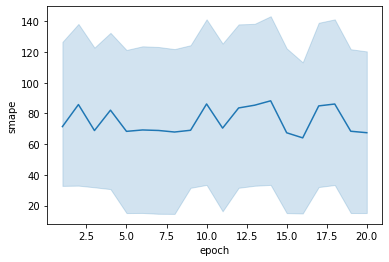

In [36]:
sns.lineplot(x='epoch', y='smape', data=df[~df['ens']])

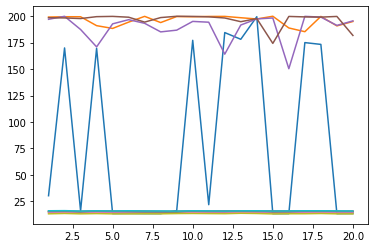

In [44]:
for n in df['num'].unique():
    if n == n:
        s = df[(df['num'] == n) & (~df['ens'])]
        plt.plot(s['epoch'], s['smape'])

In [43]:
df['num'].unique()

array([ 6., nan,  8.,  2.,  4.,  7.,  9.,  1.,  3.,  0.,  5.])

<AxesSubplot:xlabel='num', ylabel='smape'>

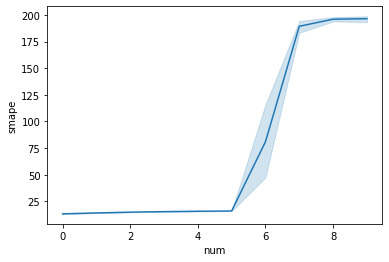

In [55]:
sns.lineplot(x='num', y='smape', data=df[~df['ens']])

In [57]:
with open('/tmp/with_snapshot.pkl', 'rb') as f:
    results_snap = pkl.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/with_snapshot.pkl'

In [58]:
!ls /tmp

aaa
aaa.h5
hsperfdata_root
inp_18__dir_bi__size_128__depth_2.pkl
inp_18__dir_bi__size_128__depth_3.pkl
inp_18__dir_bi__size_128__depth_4.pkl
inp_18__dir_bi__size_16__depth_2.pkl
inp_18__dir_bi__size_16__depth_3.pkl
inp_18__dir_bi__size_16__depth_4.pkl
inp_18__dir_bi__size_32__depth_2.pkl
inp_18__dir_bi__size_32__depth_3.pkl
inp_18__dir_bi__size_32__depth_4.pkl
inp_18__dir_bi__size_64__depth_2.pkl
inp_18__dir_bi__size_64__depth_3.pkl
inp_18__dir_bi__size_64__depth_4.pkl
inp_18__dir_uni__size_128__depth_2.pkl
inp_18__dir_uni__size_128__depth_3.pkl
inp_18__dir_uni__size_128__depth_4.pkl
inp_18__dir_uni__size_16__depth_2.pkl
inp_18__dir_uni__size_16__depth_3.pkl
inp_18__dir_uni__size_16__depth_4.pkl
inp_18__dir_uni__size_32__depth_2.pkl
inp_18__dir_uni__size_32__depth_3.pkl
inp_18__dir_uni__size_32__depth_4.pkl
inp_18__dir_uni__size_64__depth_2.pkl
inp_18__dir_uni__size_64__depth_3.pkl
inp_18__dir_uni__size_64__depth_4.pkl
inp_18__num_23000000__comb_2.pkl
inp_18__num_2300000__comb_2.pkl
in